IndexError: index 3 is out of bounds for axis 0 with size 3

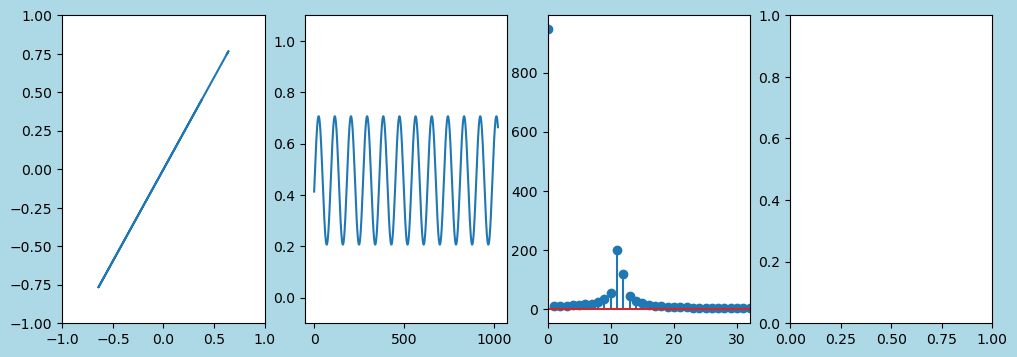

In [16]:
import numpy as np
from scipy.fft import fft, fftshift
from scipy import signal
import matplotlib.pyplot as plt
import Polarimeter_def


def findpeaks(x, y, n, w):
    index_all = list(signal.argrelmax(y, order=w))               
    index = []                                                      
    peaks = []                                                     
 

    for i in range(n):
        index.append(index_all[0][i])
        peaks.append(y[index_all[0][i]])
    index = np.array(index) * x[1]                                 
    return index, peaks

if __name__ == "__main__":
    # Define input electric field
    Ein = np.array([[1],[0]])
    # Ein = np.array([[0],[1]])

E1 = Ein

propagate1 = 2
E2 = Polarimeter_def.propagate(propagate1,E1)


# Faraday Rotation
theta1 = 0
E3 = Polarimeter_def.faradayrotaor(theta1,E2)

# Waveplate

theta2 = 45
phase2 = 180 # degree. QWP, 90

E4 = Polarimeter_def.waveplate(phase2,theta2,E3)

propagate2 = 180
E5 = Polarimeter_def.propagate(propagate2,E4)

# Faraday Rotation
theta2 = 40
E6 = Polarimeter_def.faradayrotaor(theta2,E5)


Eout = E6


m = 112
Eoutx_col = np.zeros(m)
Eouty_col = np.zeros(m)


for ii in range(m):

    opl1 = 0.05 * ii

    Eout_propagate=Polarimeter_def.propagate(opl1,Eout)

    Eoutx_col[ii] = np.real(Eout_propagate[0,0])   
    Eouty_col[ii] = np.real(Eout_propagate[1,0])


n = 2048
thetacol = np.zeros(n)
PX_qwpcol = np.zeros(n)


# Assume QWP
phase_qwp = 90 # degree. QWP


for jj in range(n):
    
    theta_var = 0.5 * jj # Wavaplate that was integrated in polarimeter

    Eout_qwp = Polarimeter_def.waveplate(phase_qwp,theta_var,Eout)
    
    thetacol[jj]=theta_var
    PX_qwpcol[jj] = abs(Eout_qwp[0,0])**2 # Linear Polarization Component



X1 = fft(PX_qwpcol)
lenX1 = len(X1)

df = 1/lenX1
Shifted_X1 = fftshift(X1)
len_Shifted_X1 = len(Shifted_X1)


Shifted_sampleIndex = np.arange(-lenX1//2, lenX1//2)

Shifted_f = Shifted_sampleIndex*df

len_Shifted_f = len(Shifted_f)

arangen = np.arange(lenX1)


fig = plt.figure(figsize = (12,4), facecolor='lightblue')
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.plot(Eoutx_col, Eouty_col)
ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)

ax2.plot(thetacol,PX_qwpcol, "-")
ax2.set_ylim(-0.1,1.1)


#ax3.stem(Shifted_f, np.abs(Shifted_X1)/N, use_line_collection=True)

ax3.stem(arangen, np.abs(X1))

#ax3.stem(freq, np.abs(X1), 'b', markerfmt=" ", basefmt="-b")
ax3.set_xlim(0,32)

#ax3.plot(Shifted_f, np.abs(Shifted_X1)/o)#, use_line_collection=True)

# Assume this light hits rotating qwp and fixed polarizer.

index, peaks = findpeaks(arangen, X1, 4, 2)

ax4.plot(arangen, np.abs(X1),label='sample', lw=1)
ax4.scatter(index, peaks, label='peaks', color='red')
ax4.legend()
ax4.set_xlim(0,32)

plt.show()